# Getting Started

pyETT: Python library for Eleven VR Table Tennis data.

In [ ]:
from pyETT import ett
import pandas as pd

## Player and user search

In order to get player's information we first need to uniquely identify a player. We can use the `user_search()` method of an object of the class `ETT` to search players by username, as follows:

In [2]:
eleven = ett.ETT()
eleven.user_search_dataframe('Highlander')

id              name     elo    rank  wins  losses  \
0   248681     Highlandersge  1488.0  361225     0       1   
1   246892     mwwhighlander  1500.0  222424     0       0   
2   218318  .::Highlander::.  1500.0  179327     0       0   
3   166876    The Highlander  1530.0   16962     4       1   
4   348353      highlanderNJ  1980.5    2288   457     364   
5   174851        Highlander  1500.0  202898     0       0   
6   273705  vikinghighlander  1430.0  361738     1      13   
7   384291      highlander10  1500.0   71453     0       0   
8   349180      brHighlandeR  1480.0  377943     1       3   
9   388282  Fred THighlander  1500.0  330717     0       0   
10  281262      Highlander34  1500.0  241598     0       0   
11  342761        HighLandeR  1509.0   55912     4       0   
12  456783      Highlander75  1500.0  380346     0       0   
13  397168     OGHighlanderr  1500.0  149347     2       0   

                 last_online  
0   2021-03-30T17:29:28.963Z  
1   2021-01-02T23:00:36.762Z  
2   2021-01-07T00:52:31.209Z  
3   2020-12-01T20:22:39.752Z  
4   2021-06-16T21:48:07.262Z  
5   2021-01-29T22:24:38.479Z  
6   2021-03-05T22:47:34.303Z  
7   2021-04-16T22:18:26.874Z  
8   2021-04-02T14:52:05.130Z  
9   2021-03-13T22:19:41.219Z  
10  2021-01-19T01:31:25.454Z  
11  2021-06-05T18:10:00.747Z  
12  2021-04-22T02:04:49.941Z  
13  2021-03-24T05:57:07.701Z

Here, the function returns all players that contain the input username string 'Highlander'. To search for a perfect match, we can pass the argument `perfect_match=True`:

In [3]:
eleven.user_search_dataframe('highlanderNJ', perfect_match=True)

id          name     elo  rank  wins  losses               last_online
0  348353  highlanderNJ  1980.5  2288   457     364  2021-06-16T21:48:07.262Z

In this search, we were able to find the player with username 'highlanderNJ' which turns out to be me. We can now instantiate a `Player` object to obtain his information:

In [4]:
print(p:=ett.Player(348353))

highlanderNJ


In [5]:
print(f"username:{p.name}\n elo:{p.elo}\n rank:{p.rank}\n wins:{p.wins}\n losses:{p.losses}\n")

username:highlanderNJ
 elo:1980.5
 rank:2288
 wins:457
 losses:364



We can see I have an Elo number of 1980.5, which puts me ranked in number 2288 in the world with 457 ranked wins and 364 losses. That's not entirely bad as the total number of active players is about 200,000 players!

## Matches and rounds

Now that we have instantiated a `Player` object, we can obtain his matches using the method `get_matches()` or `get_matches_dataframe()` to obtain the data in a nice pandas dataframe.

In [6]:
m = p.get_matches_dataframe().head()
m

created_at       id  ranked  number_of_rounds  state  \
0  2021-06-14T21:33:02.826Z  9334404    True                 3      1   
1  2021-06-14T21:29:40.751Z  9334315    True                 3      1   
2  2021-06-14T21:26:32.527Z  9334230    True                 3      1   
3  2021-06-14T16:15:47.297Z  9326236    True                 3      1   
4  2021-06-14T15:50:48.549Z  9325651    True                 3      1   

   winning_team  losing_team  home_score  away_score    home_player  \
0             1            0           0           2       pete_ed5   
1             1            0           0           2       pete_ed5   
2             0            1           2           0       pete_ed5   
3             0            1           2           1   highlanderNJ   
4             1            0           0           2  ThePongFather   

    away_player                                             rounds  
0  highlanderNJ  [<pyETT.Match.Round object at 0x7f283549c880>,...  
1  highlanderNJ  [<pyETT.Match.Round object at 0x7f283549c940>,...  
2  highlanderNJ  [<pyETT.Match.Round object at 0x7f283549c730>,...  
3   FatCatPat69  [<pyETT.Match.Round object at 0x7f283549c550>,...  
4  highlanderNJ  [<pyETT.Match.Round object at 0x7f283549cc40>,...

We can see that my latest match was against the player with username 'pete_ed5' and I won the match 2 x 0. In order to obtain the rounds information, we can use the method `get_rounds_dataframe` from the class **Match**, as follows:

In [7]:
ett.Match.get_rounds_dataframe(m.rounds[0])

id  round_number  state  away_score  home_score  winner  \
0  20931563             0      0          11           8       1   
1  20931405             0      0          11           8       1   

                 created_at  
0  2021-06-14T21:35:29.753Z  
1  2021-06-14T21:33:02.826Z

## Friends list, leaderboard and elo history

From the library, we can also obtain a player's friends list with the method `get_friends()` from an object of the Class **Player**, which also has a corresponding method that returns a list of friends in a pandas dataframe:

In [73]:
p.get_friends_dataframe().head()

id         name     elo    rank  wins  losses  \
0  249045  Buttersmier  1886.0    3656    65      59   
1  431729    JoeSixPaK  1700.5    8863   335     563   
2  495551     77696c6c  1500.0  165378     0       0   
3  456082     pete_ed5  1811.0    5170    98      91   
4  468947    dargonfar  1499.0  436880    56      90   

                last_online                                        elo_history  
0  2021-06-15T21:30:17.883Z                               elo
2021-02-06T15...  
1  2021-06-16T02:40:18.813Z                               elo
2021-04-08T17...  
2  2021-06-14T16:21:31.027Z                                               None  
3  2021-06-16T22:21:07.097Z                               elo
2021-04-21T20...  
4  2021-06-16T15:24:29.938Z                               elo
2021-06-02T20...

I'm interested in comparing my Elo score with my friends'. For that purpose, we can get a player's elo history with the method `get_elo_history()`:

In [74]:
p_elo = p.get_elo_history()
p_elo.head()

elo
2021-02-20T21:13:12.497Z  1500.0
2021-02-24T03:06:30.809Z  1513.0
2021-02-24T03:13:06.512Z  1502.0
2021-02-24T03:16:20.774Z  1489.0
2021-02-24T03:19:46.168Z  1482.0

Let's now pull the Elo history from 5 of my friends and put it all together in a dataframe including my own elo history and then plot them all:

In [56]:
from functools import reduce

n_friends = 5

friends_elo = [f.get_elo_history().rename(columns={"elo":f.name}) for f in 
               p.get_friends()[-n_friends:] if f.get_elo_history() is not None]

friends_elo.append(p.get_elo_history().rename(columns={"elo":p.name}))

group_elo_df = reduce(lambda df1,df2: pd.merge(df1,df2,how='outer', left_index=True, right_index=True), 
                      friends_elo).ffill(axis = 0)

In [54]:
group_elo_df

Buttersmier  JoeSixPaK  pete_ed5  dargonfar  \
2021-02-06T15:57:55.235Z       1500.0        NaN       NaN        NaN   
2021-02-06T16:03:26.589Z       1488.0        NaN       NaN        NaN   
2021-02-06T16:07:43.695Z       1482.0        NaN       NaN        NaN   
2021-02-06T16:09:59.066Z       1476.0        NaN       NaN        NaN   
2021-02-06T16:15:01.480Z       1473.0        NaN       NaN        NaN   
...                               ...        ...       ...        ...   
2021-06-16T21:48:09.534Z       1871.0     1705.5    1802.0     1507.0   
2021-06-16T21:51:59.103Z       1871.0     1705.5    1819.0     1507.0   
2021-06-16T21:56:39.187Z       1871.0     1705.5    1828.0     1507.0   
2021-06-16T22:01:37.654Z       1871.0     1705.5    1833.0     1507.0   
2021-06-16T22:10:05.077Z       1871.0     1705.5    1820.0     1507.0   

                          highlanderNJ  
2021-02-06T15:57:55.235Z           NaN  
2021-02-06T16:03:26.589Z           NaN  
2021-02-06T16:07:43.695Z           NaN  
2021-02-06T16:09:59.066Z           NaN  
2021-02-06T16:15:01.480Z           NaN  
...                                ...  
2021-06-16T21:48:09.534Z        1973.5  
2021-06-16T21:51:59.103Z        1973.5  
2021-06-16T21:56:39.187Z        1973.5  
2021-06-16T22:01:37.654Z        1973.5  
2021-06-16T22:10:05.077Z        1973.5  

[2181 rows x 5 columns]

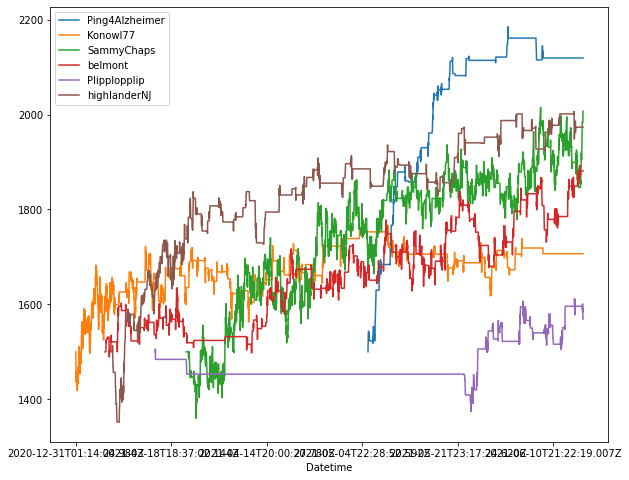

In [80]:
group_elo_df.plot(figsize=(10,8))

Overall, my friends are making some good progress. The player *Ping4Alzheimer* stands out as his Elo rating has increased from 1500 to over 2000 in a relatively short period o time. 

Now let's take a look at the leaderboard by using the method `get_leaderboard_dataframe()` from our `eleven` object:

In [83]:
eleven.get_leaderboard_dataframe()

id          name     elo  rank  wins  losses               last_online  \
0  385684         yedat  3238.2     0   948     258  2021-06-14T20:11:03.190Z   
1  347650      PROTT_VR  3095.0     1   662     119  2021-06-11T12:50:47.018Z   
2  234850  lapoctopus90  3075.0     2   699     239  2021-06-15T16:33:14.924Z   
3   11002   twISTer1979  3039.0     3  2393     919  2021-06-16T16:54:11.458Z   
4  372961     sunking73  3033.5     4   597     248  2021-06-15T09:04:15.990Z   
5  428341         NPiet  3005.0     5   976     192  2021-06-03T19:53:59.030Z   
6    3831     alexttbcn  2969.0     6  1300     617  2021-06-16T15:18:39.784Z   
7  289382     gselvas92  2966.0     7   899     337  2021-06-16T18:52:05.541Z   
8   20585      fmwallin  2960.0     8  1553     931  2021-06-15T08:53:41.094Z   
9    4410   wurstfriedl  2956.0     9  2201     932  2021-06-16T13:51:47.244Z   

                                         elo_history  
0                               elo
2021-03-12T18...  
1                               elo
2021-02-17T19...  
2                               elo
2020-12-30T13...  
3                               elo
2020-03-08T10...  
4                               elo
2021-03-06T14...  
5                               elo
2021-04-06T17...  
6                               elo
2020-02-29T13...  
7                               elo
2021-01-23T16...  
8                               elo
2020-03-25T19...  
9                               elo
2020-03-22T13...

In [81]:
lb_elo = [f.get_elo_history().rename(columns={"elo":f.name}) for f in 
               eleven.get_leaderboard() if f.get_elo_history() is not None]

lb_elo.append(p.get_elo_history().rename(columns={"elo":p.name}))

lb_elo_df = reduce(lambda df1,df2: pd.merge(df1,df2,how='outer', left_index=True, right_index=True), 
                      lb_elo).ffill(axis = 0)

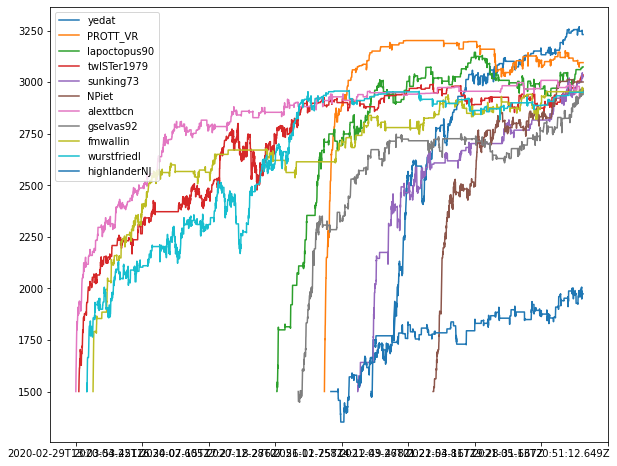

In [82]:
lb_elo_df.plot(figsize=(10,8))

The dynamics are quite different compared to the one from my cohort of friends. At the top of the leaderboard, we observe rapid Elo growth across the board. The Top 2 player (PROTT_VR), for instance, moved from a 1500 Elo to an impressive 3000+ Elo in a very short period of time. The number 1 player (yedat) has recently surpassed PROTT_VR also showing an amazing Elo growth. I have added my Elo evolution for comparison (the little blue curve at the bottom) to give a perspective on how competitive the game is at the highest level.